In [83]:
import numpy as np

from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
data = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 55s 12us/step


In [81]:
(x_train, y_train), (x_test, y_test) = data

Output of the first image from the dataset

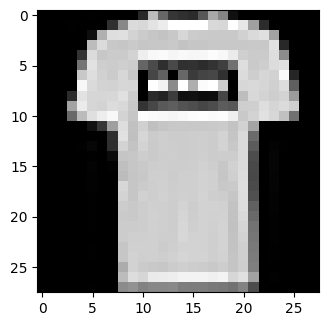

In [31]:
plt.figure(figsize=[8,8])
plt.subplot(1,2,1)
plt.imshow(x_train[1,:,:], cmap='gray')
plt.show()

In [32]:
unique_labels = np.unique(y_train)

num_classes = len(unique_labels)

print('Total number of classes : ', num_classes)
print('Unique labels : ', unique_labels)

Total number of classes :  10
Unique labels :  [0 1 2 3 4 5 6 7 8 9]


### Creating a neural network models

NN Classifier with Dense layers

In [77]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

BATCH_SIZE = 128
EPOCHS = 20

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])


Epoch 1/20
469/469 [==============================] - 36s 49ms/step - loss: 0.6387 - accuracy: 0.7732 - val_loss: 0.4263 - val_accuracy: 0.8511
Epoch 2/20
469/469 [==============================] - 19s 40ms/step - loss: 0.4335 - accuracy: 0.8456 - val_loss: 0.3958 - val_accuracy: 0.8557
Epoch 3/20
469/469 [==============================] - 19s 40ms/step - loss: 0.3871 - accuracy: 0.8607 - val_loss: 0.3727 - val_accuracy: 0.8668
Epoch 4/20
469/469 [==============================] - 18s 39ms/step - loss: 0.3631 - accuracy: 0.8696 - val_loss: 0.3605 - val_accuracy: 0.8659
Epoch 5/20
469/469 [==============================] - 18s 39ms/step - loss: 0.3439 - accuracy: 0.8761 - val_loss: 0.3424 - val_accuracy: 0.8767
Epoch 6/20
469/469 [==============================] - 19s 40ms/step - loss: 0.3330 - accuracy: 0.8806 - val_loss: 0.3495 - val_accuracy: 0.8751
Epoch 7/20
469/469 [==============================] - 18s 38ms/step - loss: 0.3227 - accuracy: 0.8837 - val_loss: 0.3370 - val_accuracy:

NN Classifier with Conv2D and MaxPooling2D layers

In [82]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

BATCH_SIZE = 128
EPOCHS = 20

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])


Epoch 1/20
469/469 [==============================] - 57s 99ms/step - loss: 0.5742 - accuracy: 0.7918 - val_loss: 0.3878 - val_accuracy: 0.8605
Epoch 2/20
469/469 [==============================] - 49s 103ms/step - loss: 0.3686 - accuracy: 0.8661 - val_loss: 0.3353 - val_accuracy: 0.8788
Epoch 3/20
469/469 [==============================] - 54s 115ms/step - loss: 0.3166 - accuracy: 0.8858 - val_loss: 0.3119 - val_accuracy: 0.8882
Epoch 4/20
469/469 [==============================] - 66s 141ms/step - loss: 0.2879 - accuracy: 0.8952 - val_loss: 0.2970 - val_accuracy: 0.8928
Epoch 5/20
469/469 [==============================] - 50s 107ms/step - loss: 0.2660 - accuracy: 0.9021 - val_loss: 0.2899 - val_accuracy: 0.8952
Epoch 6/20
469/469 [==============================] - 48s 103ms/step - loss: 0.2487 - accuracy: 0.9082 - val_loss: 0.2843 - val_accuracy: 0.8969
Epoch 7/20
469/469 [==============================] - 51s 110ms/step - loss: 0.2292 - accuracy: 0.9153 - val_loss: 0.2533 - val_acc

#### Conclusion
Today we have created a neural network for classifying images from the fashion mnist dataset. We used dense layers and layers that are used in creating CNN. The result was quite good. In the first case, we got 89% accuracy on the test data, and the accuracy of the second neural network was 91.3%.